In [1]:
import requests
from bs4 import BeautifulSoup
import os
import zipfile
import numpy as np
import pandas as pd


url = 'https://s3.amazonaws.com/tripdata/'

# load url content into soup
r = requests.get(url)
soup = BeautifulSoup(r.text, 'xml')

# extract file names from soup
files = soup.find_all('Key')
clean_files = []
for i in range(len(files)-1):
    clean_files.append(files[i].get_text())
    
clean_files

['201306-citibike-tripdata.zip',
 '201307-201402-citibike-tripdata.zip',
 '201307-citibike-tripdata.zip',
 '201308-citibike-tripdata.zip',
 '201309-citibike-tripdata.zip',
 '201310-citibike-tripdata.zip',
 '201311-citibike-tripdata.zip',
 '201312-citibike-tripdata.zip',
 '201401-citibike-tripdata.zip',
 '201402-citibike-tripdata.zip',
 '201403-citibike-tripdata.zip',
 '201404-citibike-tripdata.zip',
 '201405-citibike-tripdata.zip',
 '201406-citibike-tripdata.zip',
 '201407-citibike-tripdata.zip',
 '201408-citibike-tripdata.zip',
 '201409-citibike-tripdata.zip',
 '201410-citibike-tripdata.zip',
 '201411-citibike-tripdata.zip',
 '201412-citibike-tripdata.zip',
 '201501-citibike-tripdata.zip',
 '201502-citibike-tripdata.zip',
 '201503-citibike-tripdata.zip',
 '201504-citibike-tripdata.zip',
 '201505-citibike-tripdata.zip',
 '201506-citibike-tripdata.zip',
 '201507-citibike-tripdata.zip',
 '201508-citibike-tripdata.zip',
 '201509-citibike-tripdata.zip',
 '201510-citibike-tripdata.zip',
 '2

In [110]:
# download and unzip data files
for file in clean_files:
    file_url = url + file
    #download files
    with open(file, "wb") as f:
            response = requests.get(file_url)
            f.write(response.content)
    # unzip data files
    with zipfile.ZipFile(file, "r") as zip_ref:
        zip_ref.extractall("tripdata")        
    # remove zipped file after unziping
    os.remove(file)

In [9]:


# rename files 
directory = 'tripdata/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'):
        new_filename = filename.replace(' ','').lower().split('ci', 1)[0].strip('-').replace('-','_')
        os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename + '.csv'))
        
# #load into DataFrames into dfs dictionary
directory = 'tripdata/'
dfs = {}

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'):
        dfs[filename.split('.')[0]] = pd.read_csv(os.path.join(directory, filename)) 


In [12]:
# print(dfs)

In [13]:
# list(dfs.keys())

In [11]:
df19 = (dfs['201901'])

In [14]:
df2019 = df19.append(dfs['201902']).append(dfs['201903']).append(dfs['201904']).append(dfs['201905']).append(dfs['201906']).append(dfs['201907']).append(dfs['201908']).append(dfs['201909']).append(dfs['201910']).append(dfs['201911']).append(dfs['201912'])

In [15]:
df2019

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955205,93,2019-12-31 23:58:18.0160,2019-12-31 23:59:51.6360,3141.0,1 Ave & E 68 St,40.765005,-73.958185,3142.0,1 Ave & E 62 St,40.761227,-73.960940,28734,Subscriber,1985,2
955206,786,2019-12-31 23:58:59.8960,2020-01-01 00:12:06.3460,490.0,8 Ave & W 33 St,40.751551,-73.993934,513.0,W 56 St & 10 Ave,40.768254,-73.988639,41418,Subscriber,1991,1
955207,351,2019-12-31 23:59:03.6950,2020-01-01 00:04:54.8730,3349.0,Grand Army Plaza & Plaza St West,40.672968,-73.970880,3368.0,5 Ave & 3 St,40.672816,-73.983524,27746,Subscriber,1935,2
955208,1571,2019-12-31 23:59:21.3610,2020-01-01 00:25:32.9420,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,28506,Subscriber,1980,1


In [16]:
len(df2019)

20551697

In [17]:
# create a minutes column
df2019['trip_minutes'] = df2019.tripduration / 60

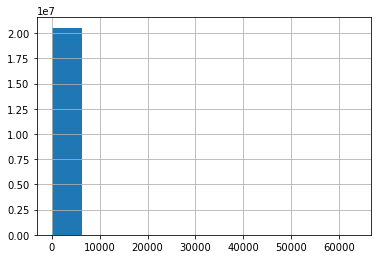

In [18]:
df2019['trip_minutes'].hist()

In [19]:
# look for trips over 2 hrs
df2019[df2019.trip_minutes > 120]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes
741,34407,2019-01-01 03:14:57.4460,2019-01-01 12:48:24.5500,3158.0,W 63 St & Broadway,40.771639,-73.982614,3165.0,Central Park West & W 72 St,40.775794,-73.976206,33158,Customer,1992,1,573.450000
1201,18093,2019-01-01 06:53:42.6940,2019-01-01 11:55:16.1660,3074.0,Montrose Ave & Bushwick Ave,40.707678,-73.940162,3077.0,Stagg St & Union Ave,40.708771,-73.950953,30174,Customer,1969,0,301.550000
1265,27858,2019-01-01 07:19:55.0100,2019-01-01 15:04:13.2010,317.0,E 6 St & Avenue B,40.724537,-73.981854,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,35268,Customer,1994,1,464.300000
1495,13473,2019-01-01 08:15:25.6150,2019-01-01 11:59:58.8540,485.0,W 37 St & 5 Ave,40.750380,-73.983390,432.0,E 7 St & Avenue A,40.726218,-73.983799,34396,Customer,1969,0,224.550000
1778,7900,2019-01-01 08:57:17.2650,2019-01-01 11:08:58.1560,432.0,E 7 St & Avenue A,40.726218,-73.983799,3623.0,W 120 St & Claremont Ave,40.810949,-73.963400,34802,Subscriber,1987,1,131.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954923,62451,2019-12-31 23:16:07.6860,2020-01-01 16:36:59.4580,3136.0,5 Ave & E 63 St,40.766368,-73.971518,3898.0,E 63 St & 3 Ave,40.763954,-73.964600,19213,Customer,1969,0,1040.850000
954943,60683,2019-12-31 23:19:46.7680,2020-01-01 16:11:10.2440,3142.0,1 Ave & E 62 St,40.761227,-73.960940,2022.0,E 60 St & York Ave,40.759107,-73.959223,40616,Customer,1996,1,1011.383333
955008,9710,2019-12-31 23:27:03.6300,2020-01-01 02:08:54.0180,3711.0,E 13 St & Avenue A,40.729667,-73.980680,426.0,West St & Chambers St,40.717548,-74.013221,27519,Subscriber,1964,1,161.833333
955042,30713,2019-12-31 23:30:30.7520,2020-01-01 08:02:24.1890,479.0,9 Ave & W 45 St,40.760193,-73.991255,447.0,8 Ave & W 52 St,40.763707,-73.985162,41369,Customer,1969,0,511.883333


In [20]:
# remove trips over 2 hours
df2019 = df2019.drop(df2019.index[(df2019['trip_minutes'] > 120)])

In [21]:
df2019[df2019.trip_minutes > 120]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes


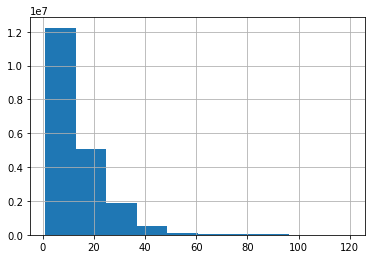

In [22]:
df2019['trip_minutes'].hist()

In [23]:
# look for short trops
df2019[df2019.trip_minutes <= 1.5]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes
131,64,2019-01-01 00:59:30.8450,2019-01-01 01:00:35.2920,402.0,Broadway & E 22 St,40.740343,-73.989551,402.0,Broadway & E 22 St,40.740343,-73.989551,34775,Customer,1983,1,1.066667
317,85,2019-01-01 01:44:36.3240,2019-01-01 01:46:01.9000,507.0,E 25 St & 2 Ave,40.739126,-73.979738,174.0,E 25 St & 1 Ave,40.738177,-73.977387,28587,Subscriber,1981,1,1.416667
461,65,2019-01-01 02:10:20.1500,2019-01-01 02:11:25.8580,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,27083,Subscriber,1982,1,1.083333
798,81,2019-01-01 03:35:07.1090,2019-01-01 03:36:28.9310,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,35759,Subscriber,1989,1,1.350000
867,79,2019-01-01 03:57:56.4140,2019-01-01 03:59:15.8350,482.0,W 15 St & 7 Ave,40.739355,-73.999318,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,33883,Subscriber,1953,1,1.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954718,72,2019-12-31 22:51:57.9080,2019-12-31 22:53:10.2790,3096.0,Union Ave & N 12 St,40.719240,-73.952420,3101.0,N 12 St & Bedford Ave,40.720798,-73.954847,28173,Subscriber,1990,1,1.200000
954783,72,2019-12-31 22:59:34.9540,2019-12-31 23:00:47.7460,3167.0,Amsterdam Ave & W 73 St,40.779668,-73.980930,3172.0,W 74 St & Columbus Ave,40.778567,-73.977550,32552,Subscriber,1985,1,1.200000
954828,73,2019-12-31 23:04:15.6450,2019-12-31 23:05:28.8400,3167.0,Amsterdam Ave & W 73 St,40.779668,-73.980930,3172.0,W 74 St & Columbus Ave,40.778567,-73.977550,33887,Subscriber,1985,1,1.216667
955006,71,2019-12-31 23:26:50.3360,2019-12-31 23:28:02.1670,3898.0,E 63 St & 3 Ave,40.763954,-73.964600,3898.0,E 63 St & 3 Ave,40.763954,-73.964600,38780,Subscriber,1960,2,1.183333


In [24]:
# drop trips less then 1.5 minutes 
df2019 = df2019.drop(df2019.index[(df2019['trip_minutes'] <= 1.5)])

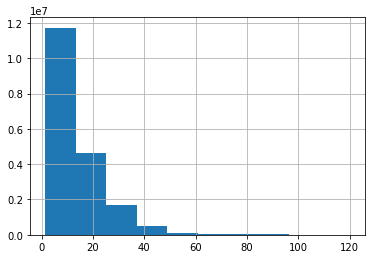

In [25]:
df2019['trip_minutes'].hist()

In [26]:
df2019.gender.value_counts()

1    12840661
2     4527605
0     1414841
Name: gender, dtype: int64

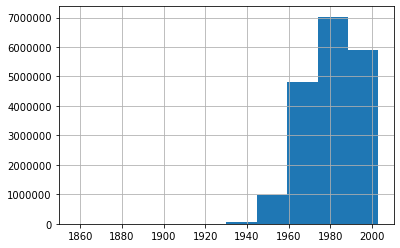

In [27]:
df2019['birth year'].hist()

In [39]:
df2019[df2019['birth year'] < 1955]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes,age
17,3494,2019-01-01 00:18:57.5640,2019-01-01 01:17:11.5700,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,35785,Subscriber,1954,1,58.233333,65
65,537,2019-01-01 00:39:36.3300,2019-01-01 00:48:34.0800,402.0,Broadway & E 22 St,40.740343,-73.989551,3244.0,University Pl & E 8 St,40.731437,-73.994903,33306,Subscriber,1949,1,8.950000,70
70,652,2019-01-01 00:41:43.5900,2019-01-01 00:52:36.5470,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,445.0,E 10 St & Avenue A,40.727408,-73.981420,35366,Subscriber,1950,1,10.866667,69
80,1285,2019-01-01 00:45:04.8600,2019-01-01 01:06:30.4940,387.0,Centre St & Chambers St,40.712733,-74.004607,439.0,E 4 St & 2 Ave,40.726281,-73.989780,34097,Subscriber,1954,2,21.416667,65
107,138,2019-01-01 00:54:59.1900,2019-01-01 00:57:17.8020,3314.0,W 95 St & Broadway,40.793770,-73.971888,3293.0,W 92 St & Broadway,40.792100,-73.973900,27036,Subscriber,1954,1,2.300000,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954806,620,2019-12-31 23:01:19.8380,2019-12-31 23:11:40.5690,127.0,Barrow St & Hudson St,40.731724,-74.006744,251.0,Mott St & Prince St,40.723180,-73.994800,38406,Subscriber,1948,2,10.333333,71
954807,427,2019-12-31 23:01:40.7990,2019-12-31 23:08:48.7680,83.0,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3418.0,Plaza St West & Flatbush Ave,40.675021,-73.971115,27411,Subscriber,1935,2,7.116667,84
955090,942,2019-12-31 23:34:59.4500,2019-12-31 23:50:41.9390,446.0,W 24 St & 7 Ave,40.744876,-73.995299,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,28463,Subscriber,1949,1,15.700000,70
955093,270,2019-12-31 23:35:25.9900,2019-12-31 23:39:56.2750,3301.0,Columbus Ave & W 95 St,40.791956,-73.968087,3293.0,W 92 St & Broadway,40.792100,-73.973900,40085,Subscriber,1954,1,4.500000,65


In [33]:
# create a age in year column
df2019['age'] = 2019 - df2019['birth year']
df2019['age'] = df2019['age'].astype(int)

In [38]:
df2019['birth year'].mean()-(2*df2019['birth year'].std())

1955.9769743630031

In [40]:

df2019 = df2019.drop(df2019.index[(df2019['birth year'] < df2019['birth year'].mean()-(2*df2019['birth year'].std()))])

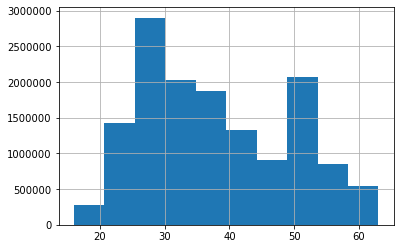

In [41]:
df2019['age'].hist()


In [42]:
df2019


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes,age
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,5.266667,55
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,9.850000,32
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,5.050000,40
5,535,2019-01-01 00:08:33.1790,2019-01-01 00:17:28.3540,3630.0,Frederick Douglass Blvd & W 115 St,40.803865,-73.955931,3529.0,Lenox Ave & W 130 St,40.810792,-73.943068,30315,Subscriber,1989,2,8.916667,30
6,280,2019-01-01 00:09:21.0060,2019-01-01 00:14:01.1510,3675.0,3 Ave & E 95 St,40.784597,-73.949685,3288.0,E 88 St & 1 Ave,40.778301,-73.948813,35391,Subscriber,1987,1,4.666667,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955200,1789,2019-12-31 23:54:54.5700,2020-01-01 00:24:43.9070,3306.0,10 St & 7 Ave,40.666208,-73.981999,3416.0,7 Ave & Park Pl,40.677615,-73.973243,40692,Subscriber,1983,1,29.816667,36
955201,193,2019-12-31 23:54:55.6090,2019-12-31 23:58:09.5930,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,344.0,Monroe St & Bedford Ave,40.685144,-73.953809,18317,Subscriber,1967,1,3.216667,52
955206,786,2019-12-31 23:58:59.8960,2020-01-01 00:12:06.3460,490.0,8 Ave & W 33 St,40.751551,-73.993934,513.0,W 56 St & 10 Ave,40.768254,-73.988639,41418,Subscriber,1991,1,13.100000,28
955208,1571,2019-12-31 23:59:21.3610,2020-01-01 00:25:32.9420,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,28506,Subscriber,1980,1,26.183333,39


In [43]:
df2019['start station name'].value_counts()

Pershing Square North        108526
8 Ave & W 31 St               82952
E 17 St & Broadway            82754
Broadway & E 22 St            77632
Broadway & E 14 St            77551
                              ...  
Madison St & Woodward Ave         4
Fairview Ave & Linden St          4
NYCBS DEPOT - DELANCEY            3
Somers St & Broadway              3
W 39 St & 9 Ave                   1
Name: start station name, Length: 938, dtype: int64

In [44]:
df2019['end station name'].value_counts()

Pershing Square North          107156
E 17 St & Broadway              85507
Broadway & E 22 St              84904
8 Ave & W 31 St                 84213
West St & Chambers St           81659
                                ...  
Sip Ave                             1
W 39 St & 9 Ave                     1
Monmouth and 6th                    1
Cadman Plaza E & Tillary St         1
Riverview Park                      1
Name: end station name, Length: 968, dtype: int64

In [45]:
df2019['start station id'].value_counts()

519.0     108526
3255.0     82952
497.0      82754
402.0      77632
285.0      77551
           ...  
3250.0         4
3909.0         4
3867.0         3
3245.0         3
488.0          1
Name: start station id, Length: 936, dtype: int64

In [46]:
df2019['end station id'].value_counts()

519.0     107156
497.0      85507
402.0      84904
3255.0     84213
426.0      81659
           ...  
3203.0         1
3202.0         1
3481.0         1
3183.0         1
232.0          1
Name: end station id, Length: 965, dtype: int64

In [2]:
# import csv
df = pd.read_csv('2019.csv') 

In [9]:
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [10]:
df['starttime'] = pd.to_datetime(df['starttime'])

In [7]:
# add gender definitions
df['gender'].replace([0,1,2],['unknown','Male','Female'],inplace=True)

In [19]:
df.head() 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes,age
0,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,Male,5.266667,55
1,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,Male,9.850000,32
2,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,Male,5.050000,40
3,535,2019-01-01 00:08:33.179,2019-01-01 00:17:28.354,3630.0,Frederick Douglass Blvd & W 115 St,40.803865,-73.955931,3529.0,Lenox Ave & W 130 St,40.810792,-73.943068,30315,Subscriber,1989,Female,8.916667,30
4,280,2019-01-01 00:09:21.006,2019-01-01 00:14:01.151,3675.0,3 Ave & E 95 St,40.784597,-73.949685,3288.0,E 88 St & 1 Ave,40.778301,-73.948813,35391,Subscriber,1987,Male,4.666667,32


In [86]:
df.dtypes


tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                  float64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                    float64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                             object
trip_minutes                      float64
age                                 int64
dtype: object

In [21]:
clean_df = df.drop(columns=['tripduration', 'start station id', 'end station id', 'birth year'])

In [84]:
clean_df

,starttime,stoptime,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,bikeid,usertype,gender,trip_minutes,age
0,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,Pershing Square North,40.751873,-73.977706,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,Male,5.266667,55
1,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,Amsterdam Ave & W 82 St,40.785247,-73.976673,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,Male,9.850000,32
2,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,Great Jones St,40.727434,-73.993790,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,Male,5.050000,40
3,2019-01-01 00:08:33.179,2019-01-01 00:17:28.354,Frederick Douglass Blvd & W 115 St,40.803865,-73.955931,Lenox Ave & W 130 St,40.810792,-73.943068,30315,Subscriber,Female,8.916667,30
4,2019-01-01 00:09:21.006,2019-01-01 00:14:01.151,3 Ave & E 95 St,40.784597,-73.949685,E 88 St & 1 Ave,40.778301,-73.948813,35391,Subscriber,Male,4.666667,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191305,2019-12-31 23:54:54.570,2020-01-01 00:24:43.907,10 St & 7 Ave,40.666208,-73.981999,7 Ave & Park Pl,40.677615,-73.973243,40692,Subscriber,Male,29.816667,36
14191306,2019-12-31 23:54:55.609,2019-12-31 23:58:09.593,Macon St & Nostrand Ave,40.680983,-73.950048,Monroe St & Bedford Ave,40.685144,-73.953809,18317,Subscriber,Male,3.216667,52
14191307,2019-12-31 23:58:59.896,2020-01-01 00:12:06.346,8 Ave & W 33 St,40.751551,-73.993934,W 56 St & 10 Ave,40.768254,-73.988639,41418,Subscriber,Male,13.100000,28
14191308,2019-12-31 23:59:21.361,2020-01-01 00:25:32.942,MacDougal St & Washington Sq,40.732264,-73.998522,Clinton Ave & Myrtle Ave,40.693261,-73.968896,28506,Subscriber,Male,26.183333,39


In [85]:
# save to a csv
clean_df.to_csv(r'2019.csv', index = False)

In [69]:
trip_df = pd.read_csv('trip_count.csv') 

In [5]:
# trip_df = df.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')

In [70]:
# create single column with trip start point and end point header
trip_df['Trips between Stations'] = trip_df['start station name'] + '  to  ' + trip_df['end station name']
trip_df.head()

,start station name,end station name,Number of Trips,Trips between Stations
0,E 7 St & Avenue A,Cooper Square & Astor Pl,5810,E 7 St & Avenue A to Cooper Square & Astor Pl
1,Central Park S & 6 Ave,Central Park S & 6 Ave,4527,Central Park S & 6 Ave to Central Park S & 6...
2,Central Park S & 6 Ave,5 Ave & E 88 St,4369,Central Park S & 6 Ave to 5 Ave & E 88 St
3,North Moore St & Greenwich St,Vesey Pl & River Terrace,3872,North Moore St & Greenwich St to Vesey Pl & ...
4,Vesey Pl & River Terrace,North Moore St & Greenwich St,3732,Vesey Pl & River Terrace to North Moore St &...


In [71]:
trip_df = trip_df.drop(columns=['start station name', 'end station name'])

In [74]:
trip_df = trip_df[['Trips between Stations','Number of Trips']]

In [78]:
trip_df.to_csv(r'trip_count.csv', index = False)

In [87]:

trip_df.head()


,Trips between Stations,Number of Trips
0,E 7 St & Avenue A to Cooper Square & Astor Pl,5810
1,Central Park S & 6 Ave to Central Park S & 6...,4527
2,Central Park S & 6 Ave to 5 Ave & E 88 St,4369
3,North Moore St & Greenwich St to Vesey Pl & ...,3872
4,Vesey Pl & River Terrace to North Moore St &...,3732


In [88]:
trip_top_20 = trip_df.head(20)


In [77]:
trip_top_20.to_csv(r'Top 20 Trips.csv', index = False)

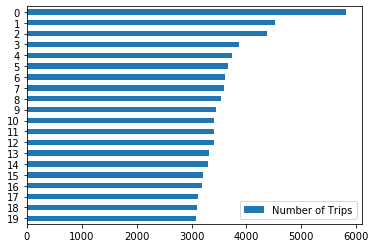

In [33]:
trip_df.head(20).sort_index(ascending = False).plot.barh()

In [16]:
trip_df.to_csv(r'trip_count.csv', index = False)

In [11]:
# create a use by station df
stationUse_df = df.groupby(['start station name']).size().reset_index(name = 'Station Use')

In [12]:
stationUse_df = stationUse_df.sort_values('Station Use', ascending = False);

In [13]:
stationUse_df.head()

,start station name,Station Use
700,Pershing Square North,108526
134,8 Ave & W 31 St,82952
367,E 17 St & Broadway,82754
193,Broadway & E 22 St,77632
192,Broadway & E 14 St,77551


In [18]:
stationUse_df.to_csv(r'station_use.csv', index = False)

In [14]:
# create a bike use frequency df
bike_use_df = df.groupby(['bikeid']).size().reset_index(name = 'Number of Times Used');
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False);

In [15]:
bike_use_df.head()

,bikeid,Number of Times Used
13947,35194,2183
13390,34332,2158
13258,34187,2129
13732,34969,2124
13361,34295,2119


In [19]:
bike_use_df.to_csv(r'bike_use.csv', index = False)

In [21]:
df['start station id'].unique().shape

(937,)

In [22]:
df['end station id'].unique().shape

(966,)

In [25]:
# create a station list to include start stations and end stations and delete duplicates
t1 = df[['start station id', 'start station name', 'start station latitude', 'start station longitude']] \
            .drop_duplicates().rename(columns = {'start station id':'station id', \
                                                 'start station name':'station name', \
                                                 'start station latitude':'station latitude', 
                                                 'start station longitude': 'station longitude'})
t2 = df[['end station id', 'end station name', 'end station latitude', 'end station longitude']] \
        .drop_duplicates().rename(columns = {'end station id':'station id', \
                                             'end station name':'station name', \
                                             'end station latitude':'station latitude', \
                                             'end station longitude': 'station longitude'})
location_df = pd.concat([t1, t2]).drop_duplicates()

In [24]:
location_df = location_df.drop(columns=['station id'])
location_df.drop_duplicated(subset='station name')
  
result_df = location_df.drop_duplicates()
print('Result DataFrame:\n', result_df)


Result DataFrame:
                             station name  station latitude  station longitude
0                  Pershing Square North         40.751873         -73.977706
1                Amsterdam Ave & W 82 St         40.785247         -73.976673
2                         Great Jones St         40.727434         -73.993790
3     Frederick Douglass Blvd & W 115 St         40.803865         -73.955931
4                        3 Ave & E 95 St         40.784597         -73.949685
...                                  ...               ...                ...
1083                   E 2 St & Avenue A         40.722000         -73.986000
1084                    5 Ave & E 103 St         40.791000         -73.953000
1085             W 70 St & Amsterdam Ave         40.776000         -73.983000
1086            Morgan Ave & Maspeth Ave         40.716000         -73.935000
1087              Myrtle Ave & Marcy Ave         40.695000         -73.950000

[1088 rows x 3 columns]


In [27]:
result_df.to_csv(r'station_list.csv', index = False)

In [ ]:
 df.to_csv(r'bike_use.csv', index = False)

In [2]:
clean2_df = pd.read_csv('2019.csv') 

In [9]:
clean2_df.head()

,starttime,stoptime,start station name,end station name,bikeid,usertype,gender,trip_minutes,age
0,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,Pershing Square North,E 39 St & 2 Ave,32723,Subscriber,Male,5.266667,55
1,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,Amsterdam Ave & W 82 St,E 77 St & 3 Ave,27451,Subscriber,Male,9.850000,32
2,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,Great Jones St,E 20 St & Park Ave,35379,Subscriber,Male,5.050000,40
3,2019-01-01 00:08:33.179,2019-01-01 00:17:28.354,Frederick Douglass Blvd & W 115 St,Lenox Ave & W 130 St,30315,Subscriber,Female,8.916667,30
4,2019-01-01 00:09:21.006,2019-01-01 00:14:01.151,3 Ave & E 95 St,E 88 St & 1 Ave,35391,Subscriber,Male,4.666667,32


In [14]:
# drop redundent columns
clean2_df = clean2_df.drop(columns=['start station latitude', 'start station longitude',\
                                    'end station latitude', 'end station longitude'])
# clean2_df.head()

In [13]:
clean2_df.to_csv(r'20192.csv', index = False)

In [2]:
df = pd.read_csv('20192.csv') 

In [3]:
df


,starttime,stoptime,start station name,end station name,bikeid,usertype,gender,trip_minutes,age
0,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,Pershing Square North,E 39 St & 2 Ave,32723,Subscriber,Male,5.266667,55
1,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,Amsterdam Ave & W 82 St,E 77 St & 3 Ave,27451,Subscriber,Male,9.850000,32
2,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,Great Jones St,E 20 St & Park Ave,35379,Subscriber,Male,5.050000,40
3,2019-01-01 00:08:33.179,2019-01-01 00:17:28.354,Frederick Douglass Blvd & W 115 St,Lenox Ave & W 130 St,30315,Subscriber,Female,8.916667,30
4,2019-01-01 00:09:21.006,2019-01-01 00:14:01.151,3 Ave & E 95 St,E 88 St & 1 Ave,35391,Subscriber,Male,4.666667,32
...,...,...,...,...,...,...,...,...,...
14191305,2019-12-31 23:54:54.570,2020-01-01 00:24:43.907,10 St & 7 Ave,7 Ave & Park Pl,40692,Subscriber,Male,29.816667,36
14191306,2019-12-31 23:54:55.609,2019-12-31 23:58:09.593,Macon St & Nostrand Ave,Monroe St & Bedford Ave,18317,Subscriber,Male,3.216667,52
14191307,2019-12-31 23:58:59.896,2020-01-01 00:12:06.346,8 Ave & W 33 St,W 56 St & 10 Ave,41418,Subscriber,Male,13.100000,28
14191308,2019-12-31 23:59:21.361,2020-01-01 00:25:32.942,MacDougal St & Washington Sq,Clinton Ave & Myrtle Ave,28506,Subscriber,Male,26.183333,39


In [6]:
df = df.dropna()

In [7]:
df.to_csv(r'20192.csv', index = False)